In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [50]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library
import numpy.random as rn
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression
import matplotlib.colors as pltco # A package to help with coloring plots


[x for x in dir(list) if not '__' in x]
  
# Current Workforce demographic for the state of colorado input from dropbox
workforce_demographic2018 = pa.read_csv('https://www.dropbox.com/s/w1zzumsadlgg9pn/Colorado_Current_Workforce_Demographic.csv?dl=1')


workforce_demographic2018.head()

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,8,CO,Colorado,00-0000,All Occupations,total,"2,620,640",0.3,1000.000,1.00,...,20.34,32.49,50.05,"22,480","28,110","42,310","67,570","104,110",NaN,NaN
1,8,CO,Colorado,11-0000,Management Occupations,major,"116,770",1.1,44.556,0.85,...,56.15,78.38,#,"55,700","79,630","116,800","163,030",#,NaN,NaN
2,8,CO,Colorado,11-1011,Chief Executives,detailed,570,5.3,0.216,0.16,...,86.63,#,#,"85,110","118,210","180,190",#,#,NaN,NaN
3,8,CO,Colorado,11-1021,General and Operations Managers,detailed,"39,200",1.9,14.958,0.95,...,51.51,81.71,#,"46,310","67,650","107,140","169,970",#,NaN,NaN
4,8,CO,Colorado,11-1031,Legislators,detailed,630,8.0,0.239,0.69,...,*,*,*,"21,230","23,970","48,260","68,270","100,430",True,NaN


In [51]:
def remove_strings (X):
    try:
        if '+' in X:
            K = X.find('+')
            return X[:K]
        if '-' in X:
            K = X.find('-')
            return X[:K]
        if '**' in X:
            K = X.find('**')
            return X[:K]
        if '*' in X:
            K = X.find('*')
            return X[:K]
        if '#' in X:
            K = X.find('#')
            return X[:K]
        else:  
            return X
    except ValueError:
        return X

def convertFloat(dataframe, feature):
    for K in dataframe.index: 
        dataframe.loc[K,feature] = remove_strings(dataframe.loc[K, feature])
        
    
    dataframe.loc[:, feature] = dataframe.loc[:,feature].astype("float")  
    return dataframe

In [52]:
workforce_demographic2018 = convertFloat(workforce_demographic2018, "OCC_CODE")  ##this works to convert OCC_Code to float64

In [54]:
workforce_demographic2018['TOT_EMP'] = workforce_demographic2018['TOT_EMP'].str.replace(',','')
workforce_demographic2018['TOT_EMP'].replace('', np.nan, inplace=True)
workforce_demographic2018 = workforce_demographic2018[workforce_demographic2018['TOT_EMP'].notna()]
workforce_demographic2018 = convertFloat(workforce_demographic2018, "TOT_EMP")  ##this works to convert OCC_Code to float64

/Users/Luke/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [55]:
workforce_demographic2018['EMP_PRSE'].replace('', np.nan, inplace=True)
workforce_demographic2018 = workforce_demographic2018[workforce_demographic2018['EMP_PRSE'].notna()]
workforce_demographic2018 = convertFloat(workforce_demographic2018, "EMP_PRSE")  ##this works to convert OCC_Code to float64

/Users/Luke/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
workforce_demographic2018['JOBS_1000'].replace('', np.nan, inplace=True)
workforce_demographic2018 = workforce_demographic2018[workforce_demographic2018['JOBS_1000'].notna()]
workforce_demographic2018 = convertFloat(workforce_demographic2018, "JOBS_1000")  ##this works to convert OCC_Code to float64

In [18]:
workforce_demographic2018['LOC_Q'].replace('', np.nan, inplace=True)
workforce_demographic2018 = workforce_demographic2018[workforce_demographic2018['LOC_Q'].notna()]
workforce_demographic2018 = convertFloat(workforce_demographic2018, "LOC_Q")  ##this works to convert OCC_Code to float64

In [20]:
workforce_demographic2018['H_MEAN'].replace('', np.nan, inplace=True)  ##This one has some problems
workforce_demographic2018 = workforce_demographic2018[workforce_demographic2018['H_MEAN'].notna()]
workforce_demographic2018 = convertFloat(workforce_demographic2018, "H_MEAN")  ##this works to convert OCC_Code to float64

In [57]:
workforce_demographic2018['A_MEAN'] = workforce_demographic2018['A_MEAN'].str.replace(',','') ##This one has some problems
workforce_demographic2018['A_MEAN'].replace('', np.nan, inplace=True)
workforce_demographic2018 = workforce_demographic2018[workforce_demographic2018['A_MEAN'].notna()]
workforce_demographic2018 = convertFloat(workforce_demographic2018, "A_MEAN")  ##this works to convert OCC_Code to float64

In [23]:
workforce_demographic2018 = convertFloat(workforce_demographic2018, "MEAN_PRSE")  ##this works to convert OCC_Code to float64

In [24]:
workforce_demographic2018['H_PCT10'].replace('', np.nan, inplace=True)
workforce_demographic2018 = workforce_demographic2018[workforce_demographic2018['H_PCT10'].notna()]
workforce_demographic2018 = convertFloat(workforce_demographic2018, "H_PCT10")  

In [26]:
workforce_demographic2018['H_PCT25'].replace('', np.nan, inplace=True)        ##This one has some problems
workforce_demographic2018 = workforce_demographic2018[workforce_demographic2018['H_PCT25'].notna()]
workforce_demographic2018 = convertFloat(workforce_demographic2018, "H_PCT25")  

In [28]:
workforce_demographic2018['H_MEDIAN'].replace('', np.nan, inplace=True)      ##This one has some problems
workforce_demographic2018 = workforce_demographic2018[workforce_demographic2018['H_MEDIAN'].notna()]
workforce_demographic2018 = convertFloat(workforce_demographic2018, "H_MEDIAN") 

In [30]:
workforce_demographic2018['H_PCT75'].replace('', np.nan, inplace=True)      ##This one has some problems
workforce_demographic2018 = workforce_demographic2018[workforce_demographic2018['H_PCT75'].notna()]
workforce_demographic2018 = convertFloat(workforce_demographic2018, "H_PCT75")  ##this works to convert OCC_Code to float64

In [32]:
workforce_demographic2018['H_PCT90'].replace('', np.nan, inplace=True)     ##This one has some problems
workforce_demographic2018 = workforce_demographic2018[workforce_demographic2018['H_PCT90'].notna()]
workforce_demographic2018 = convertFloat(workforce_demographic2018, "H_PCT90")  ##this works to convert OCC_Code to float64

In [49]:
workforce_demographic2018.dtypes

dtype('O')

In [34]:
total_employees_array = workforce_demographic2018[["TOT_EMP"]].to_numpy()

In [488]:
for l in range(total_employees_array.shape[1]):
    total_employees_array[:, l] = ( total_employees_array[:, l] - total_employees_array[:, l].min())/(total_employees_array[:, l].max() - total_employees_array[:, l].min())

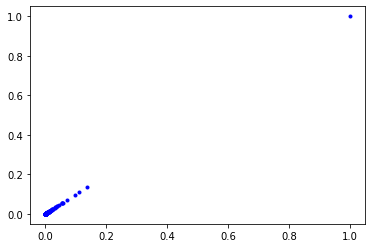

In [494]:
plt.plot(total_employees_array[:, 0], total_employees_array[:, 0], 'b.');
plt.savefig('17.1.png')

In [497]:
jobs_per_1000 = workforce_demographic2018[["JOBS_1000"]].to_numpy()

In [498]:
for l in range(jobs_per_1000.shape[1]):
    jobs_per_1000[:, l] = (jobs_per_1000[:, l] - jobs_per_1000[:, l].min())/(jobs_per_1000[:, l].max() - jobs_per_1000[:, l].min())

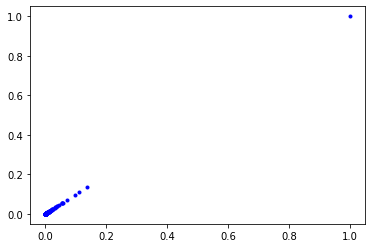

In [499]:
plt.plot(total_employees_array[:, 0], total_employees_array[:, 0], 'b.');
plt.savefig('17.1.png')

In [509]:
workforce_demographic2018 = workforce_demographic2018.drop([0])   ## Remove the first row from the data frame becasue it contains all the jobs combined and is an "outlier"
X = np.array(workforce_demographic2018[['TOT_EMP']])

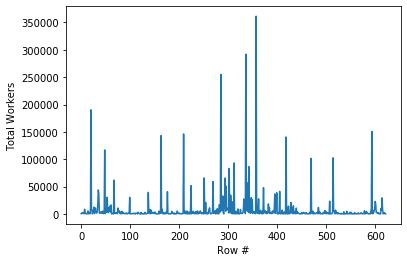

In [530]:
plt.plot(X)
plt.ylabel('Total Workers')
plt.xlabel('Row #')
plt.show()

In [48]:
Y = np.array(workforce_demographic2018[['A_MEAN']])   #try log mean salary
Z = np.array(workforce_demographic2018[['EMP_PRSE']])

KeyError: "None of [Index(['A_MEAN'], dtype='object')] are in the [index]"

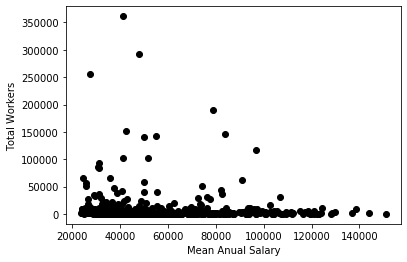

In [528]:
plt.xlabel('Mean Anual Salary')
plt.ylabel('Total Workers')
plt.plot(Y, X, 'o', color='black');

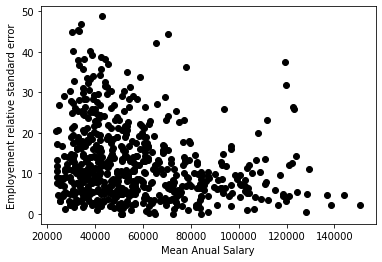

In [526]:
plt.xlabel('Mean Anual Salary')
plt.ylabel('Employement relative standard error')
plt.plot(Y, Z, 'o', color='black');

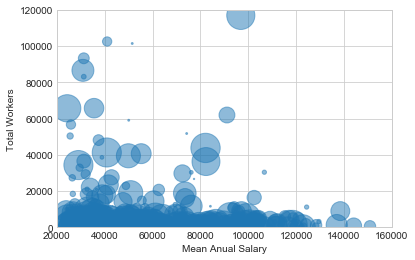

In [570]:
N = 100
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
plt.xlabel('Mean Anual Salary')
plt.ylabel('Total Workers')
plt.xlim(20000, 160000)
plt.ylim(0, 120000)
plt.scatter(Y, X, s=area, alpha=0.5)   # s = Z 
plt.show()

A = workforce_demographic2018.iloc[:, 6]
B = workforce_demographic2018.iloc[:, 11]
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(workforce_demographic2018)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
workforce_demographic2018['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(workforce_demographic2018.groupby('cluster').mean(),1))
kmeans_mean_cluster

In [590]:
nueral_network_input1 = np.array(workforce_demographic2018[['TOT_EMP', 'EMP_PRSE']])
nueral_network_input2 = np.array(workforce_demographic2018['OCC_CODE'])
nueral_network_input3 = np.array(workforce_demographic2018['A_MEAN'])

In [593]:
def plot_reg_model(reg, X, y):

    # We shuffle the data using a random permutation

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    reg.fit(X_train, y_train) # Fit the model
     
    nn = 200
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   # Changed the function to use linspace rather than arrange
        np.linspace(y_min, y_max, nn))                    # This keeps us from having to adjust h.
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) # predict

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    #plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    plt.xlim(0, 7500)
    plt.ylim(0, 55)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c="r", marker='.')
    plt.scatter(X_test[:, 0], X_test[:, 1], c="b", marker='.');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

Training R2: 0.08047978197653327
Testing R2: 0.02088499247932951


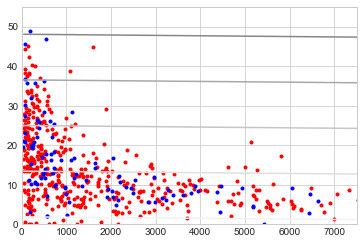

In [594]:
reg = LinearRegression()
plot_reg_model(reg, nueral_network_input1, nueral_network_input2);

Training R2: 0.0490647970645709
Testing R2: 0.08546716893269402


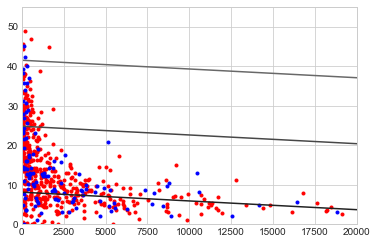

In [592]:
reg = LinearRegression()
plot_reg_model(reg, nueral_network_input1, nueral_network_input3);

In [36]:
def cluster_plot(cluster, X):
       
    n_clusters = cluster.get_params()['n_clusters']
    cmap_bold = pltco.ListedColormap([cm.hot(k/n_clusters) for k in range(n_clusters) ])  
    # We need a color map that expands to match the number of clusters

    plt.scatter(X[:, 0], X[:, 1], c=cluster.fit_predict(X), cmap=cmap_bold,marker='.')

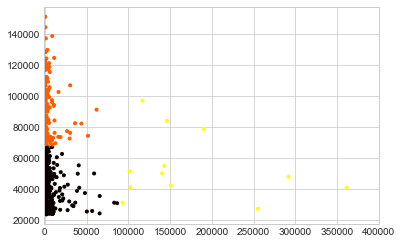

In [37]:
total_employees_anuanl_mean = workforce_demographic2018[['TOT_EMP', 'A_MEAN']].to_numpy()
cluster = KMeans(n_clusters=4)
cluster_plot(cluster, total_employees_anuanl_mean)
plt.xlim(-1000, 400000);

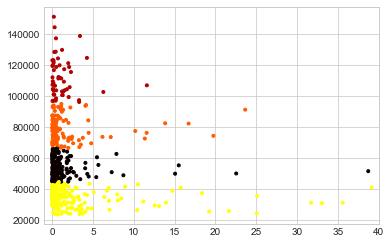

In [38]:
jobs_1000_anual_mean = workforce_demographic2018[['JOBS_1000', 'A_MEAN']].to_numpy()
cluster = KMeans(n_clusters=4)
cluster_plot(cluster, jobs_1000_anual_mean)
plt.xlim(-1, 40);

In [58]:
major_groups = pa.np.where(workforce_demographic2018.OCC_TITLE.str.contains("major"))

In [61]:
workforce_demographic2018['OCC_GROUP'].astype(str)

KeyError: 'OCC_GROUP'

In [60]:
major_groups_df = workforce_demographic2018.loc[workforce_demographic2018.OCC_GROUP.apply(lambda cat: 'major' in cat)]
detailed_groups_df = workforce_demographic2018.loc[workforce_demographic2018.OCC_GROUP.apply(lambda cat: 'detailed' in cat)]

AttributeError: 'Series' object has no attribute 'OCC_GROUP'

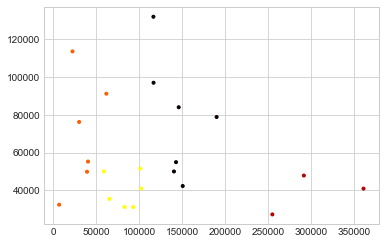

In [711]:
total_employees_anuanl_mean_major = major_groups_df[['TOT_EMP', 'A_MEAN']].to_numpy()
cluster = KMeans(n_clusters=4)
cluster_plot(cluster, total_employees_anuanl_mean_major)

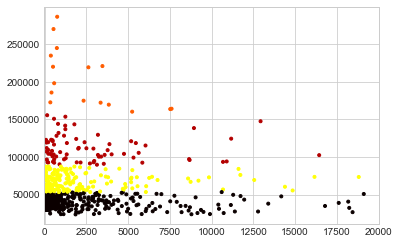

In [716]:
total_employees_anuanl_mean_detailed = detailed_groups_df[['TOT_EMP', 'A_MEAN']].to_numpy()
cluster = KMeans(n_clusters=4)
cluster_plot(cluster, total_employees_anuanl_mean_detailed)
plt.xlim(-50,20000);

In [63]:
km = KMeans(n_clusters=5).fit(major_groups_df[['TOT_EMP', 'A_MEAN']])

NameError: name 'major_groups_df' is not defined